In [1]:
# !pip install lightning-flash[image]

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch

import flash
from flash.core.data.utils import download_data
from flash.image import SemanticSegmentation, SemanticSegmentationData
from flash.image import ImageClassifier

from matplotlib import pyplot as plt
import numpy as np

In [3]:
SemanticSegmentation.available_heads()

['deeplabv3',
 'deeplabv3plus',
 'fpn',
 'linknet',
 'manet',
 'pan',
 'pspnet',
 'unet',
 'unetplusplus']

In [4]:
ImageClassifier.available_backbones()

['adv_inception_v3',
 'bat_resnext26ts',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dino_deits16',
 'dino_deits8',
 'dino_vitb16',
 'dino_vitb8',
 'dla102',
 

In [5]:


# 1. Create the DataModule
# The data was generated with the  CARLA self-driving simulator as part of the Kaggle Lyft Udacity Challenge.
# More info here: https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge
download_data(
    "https://github.com/ongchinkiat/LyftPerceptionChallenge/releases/download/v0.1/carla-capture-20180513A.zip",
    "./data",
)

datamodule = SemanticSegmentationData.from_folders(
    train_folder="data/CameraRGB",
    train_target_folder="data/CameraSeg",
    val_split=0.1,
#     transform=
    transform_kwargs=dict(image_size=(256, 256)),
    num_classes=21,
    batch_size=4,
)

# 2. Build the task
model = SemanticSegmentation(
    backbone="mobilenetv3_large_100",
    head="fpn",
    num_classes=datamodule.num_classes,
)

# 3. Create the trainer and finetune the model
trainer = flash.Trainer(max_epochs=3, gpus=torch.cuda.device_count())
trainer.finetune(model, datamodule=datamodule, strategy="freeze")

# 4. Segment a few images!
datamodule = SemanticSegmentationData.from_files(
    predict_files=[
        "data/CameraRGB/F61-1.png",
        "data/CameraRGB/F62-1.png",
        "data/CameraRGB/F63-1.png",
    ],
    batch_size=3,
)
predictions = trainer.predict(model, datamodule=datamodule, output="preds")
print(predictions)

# 5. Save the model!
# trainer.save_checkpoint("semantic_segmentation_model.pt")

/home/riz/anaconda3/envs/py10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:261: UserWarning: Attribute 'metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['metrics'])`.
  rank_zero_warn(
Using 'mobilenetv3_large_100' provided by qubvel/segmentation_models.pytorch (https://github.com/qubvel/segmentation_models.pytorch).
Using 'fpn' provided by qubvel/segmentation_models.pytorch (https://github.com/qubvel/segmentation_models.pytorch).
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type               | Params
-----------------------------------------------------
0 | train_metrics | ModuleDict         | 0     
1 | val_metrics   | ModuleDict         | 0     
2 | test_metrics  | ModuleDict         | 0     
3

Sanity Checking: 0it [00:00, ?it/s]

/home/riz/anaconda3/envs/py10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/riz/anaconda3/envs/py10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/riz/anaconda3/envs/py10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 225it [00:00, ?it/s]

[[tensor([[[ 3.0115,  3.0115,  3.0115,  ..., 11.3442, 11.3442, 11.3442],
         [ 3.0115,  3.0115,  3.0115,  ..., 11.3442, 11.3442, 11.3442],
         [ 3.0147,  3.0147,  3.0147,  ..., 11.3276, 11.3276, 11.3276],
         ...,
         [ 0.4217,  0.4217,  0.4217,  ...,  0.6217,  0.6217,  0.6217],
         [ 0.4222,  0.4222,  0.4222,  ...,  0.6079,  0.6079,  0.6079],
         [ 0.4222,  0.4222,  0.4222,  ...,  0.6079,  0.6079,  0.6079]],

        [[ 2.3683,  2.3683,  2.3683,  ..., -2.7639, -2.7639, -2.7639],
         [ 2.3683,  2.3683,  2.3683,  ..., -2.7639, -2.7639, -2.7639],
         [ 2.3724,  2.3724,  2.3724,  ..., -2.7445, -2.7445, -2.7445],
         ...,
         [ 0.9229,  0.9229,  0.9229,  ..., -1.6764, -1.6764, -1.6764],
         [ 0.9270,  0.9270,  0.9270,  ..., -1.6727, -1.6727, -1.6727],
         [ 0.9270,  0.9270,  0.9270,  ..., -1.6727, -1.6727, -1.6727]],

        [[-2.8333, -2.8333, -2.8333,  ...,  0.3346,  0.3346,  0.3346],
         [-2.8333, -2.8333, -2.8333,  ..., 

In [6]:
def display_images(nrow, ncol, image_names, image_arrays, fig_name, fig_size=(32, 16), ):

    fig, axs = plt.subplots(nrow, ncol, figsize=fig_size, constrained_layout=True)
    axs = axs.flatten()
    
    for count, ax in enumerate(axs):
        ax.imshow(image_arrays[count])
        ax.set_title(image_names[count])
        ax.grid(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    fig.savefig(fig_name)

In [7]:
from PIL import Image

ori_image = Image.open("data/CameraRGB/F61-1.png")

gt_seg = Image.open("data/CameraSeg/F61-1.png")
gt_seg, _, _ = gt_seg.split()

pred_0 = predictions[0][0]
pred_seg = np.argmax(pred_0, axis=0)

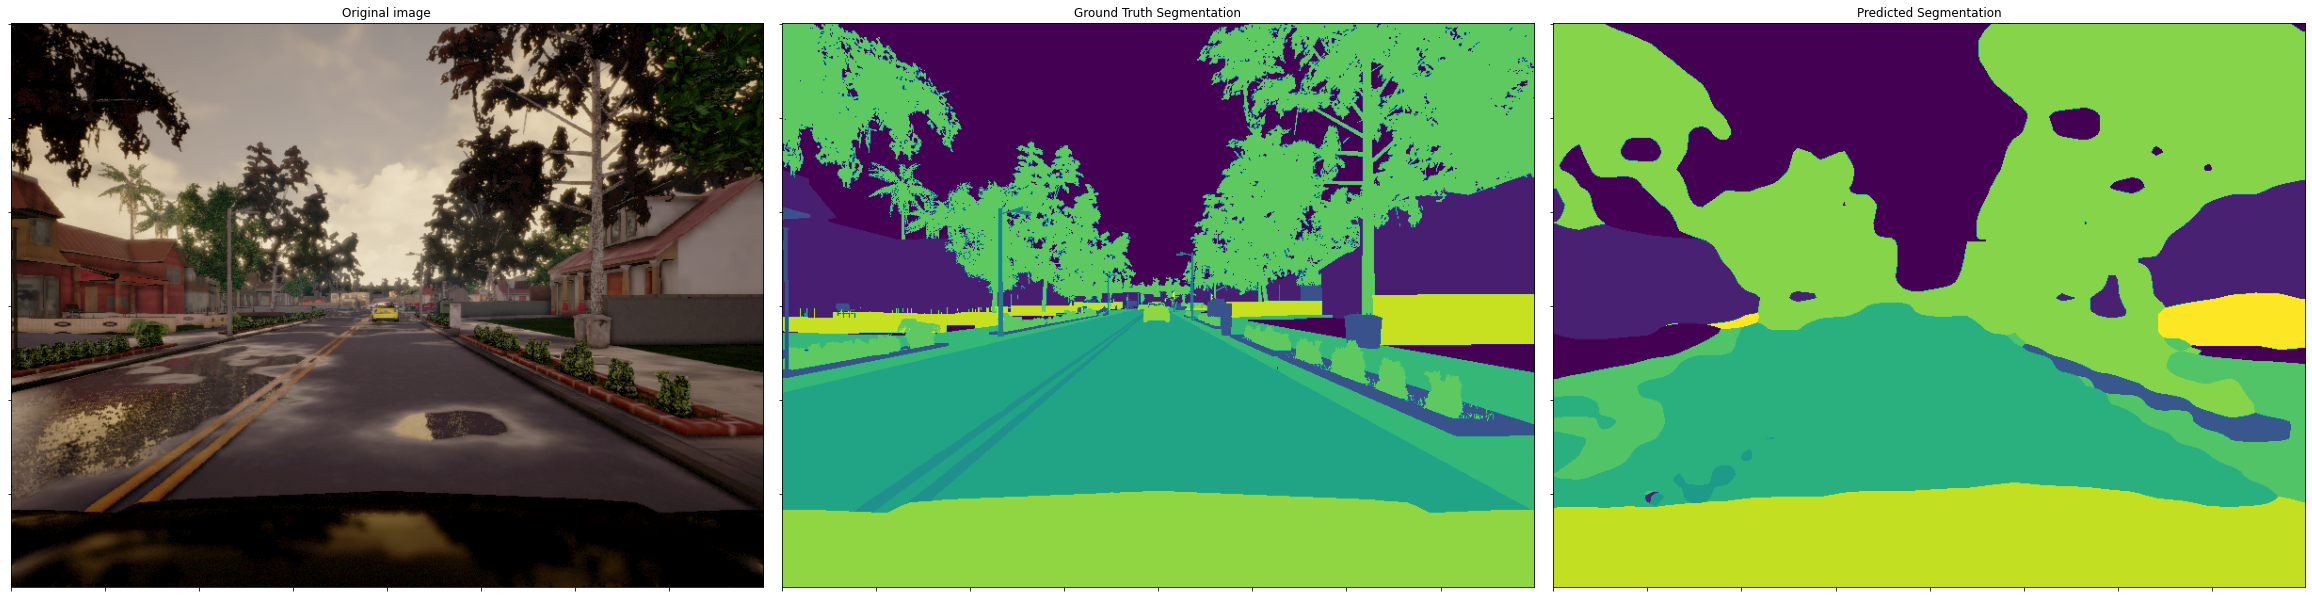

In [8]:
image_names = ["Original image", "Ground Truth Segmentation", "Predicted Segmentation"]
image_arrays = [ori_image, gt_seg, pred_seg]
display_images(nrow=1, ncol=3, image_names=image_names, image_arrays=image_arrays, fig_name='mobilenetv3_large_100-FPN.png')